In [7]:
import numpy as np
import pandas as pd

In [13]:
import matplotlib.pyplot as plt


In [12]:
import seaborn as sns


In [8]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [10]:
df.shape

(11251, 15)

In [13]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [19]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

KeyError: "['Status', 'unnamed1'] not found in axis"

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [23]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [5]:
df.dropna(inplace= True)

NameError: name 'df' is not defined

In [25]:
df['Amount']= df['Amount'].astype('int')

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [26]:
df['Amount'].dtypes

dtype('int32')

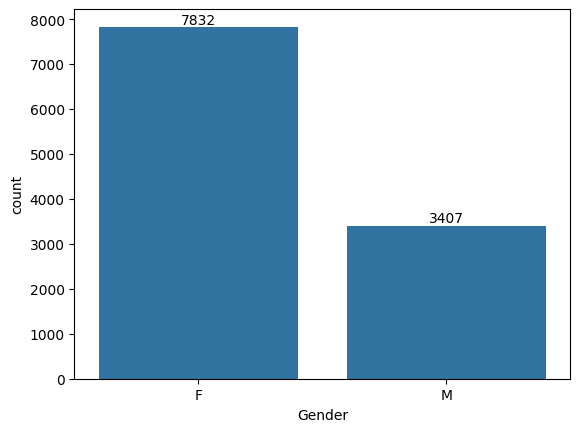

In [30]:
ax= sns.countplot(x='Gender', data=df)
for bar in ax.containers:
    ax.bar_label(bar)

In [11]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

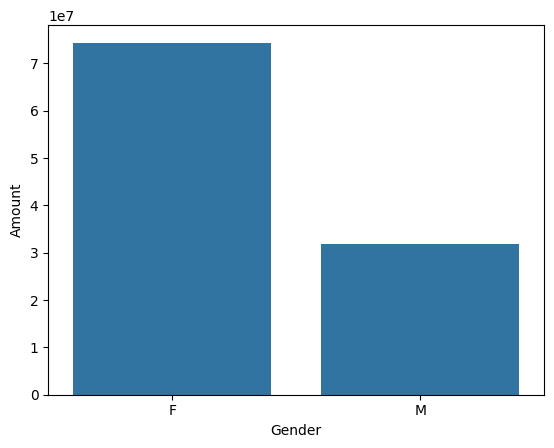

In [14]:
sales_gen= df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data= sales_gen)

<Axes: xlabel='Age Group', ylabel='count'>

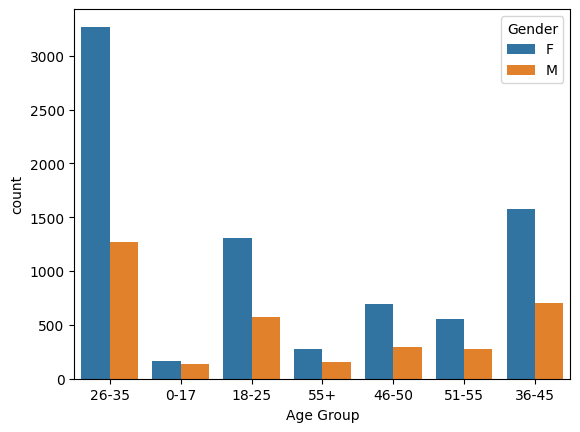

In [16]:
sns.countplot(data= df, x='Age Group', hue= 'Gender')

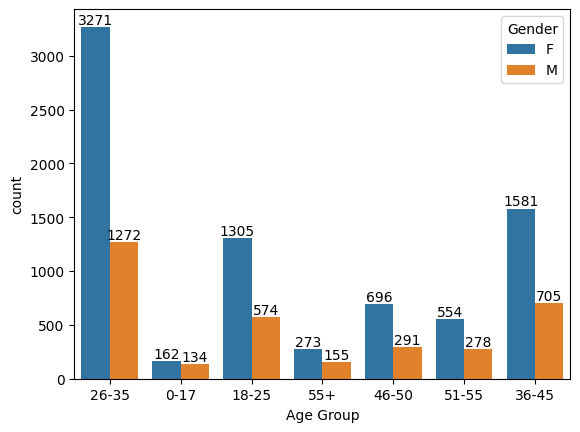

In [18]:
ax= sns.countplot(data= df, x='Age Group', hue= 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

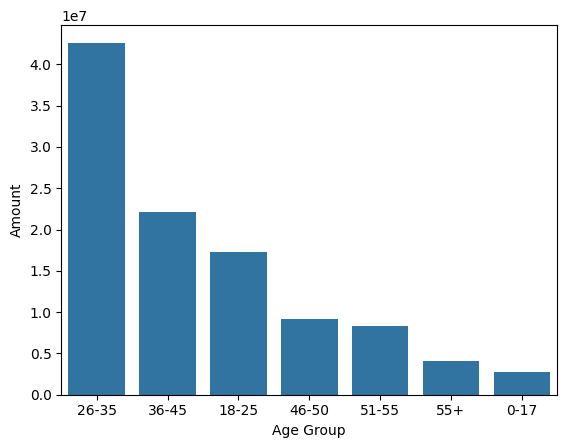

In [23]:
amount_age= df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data= amount_age)

<Axes: xlabel='State', ylabel='Orders'>

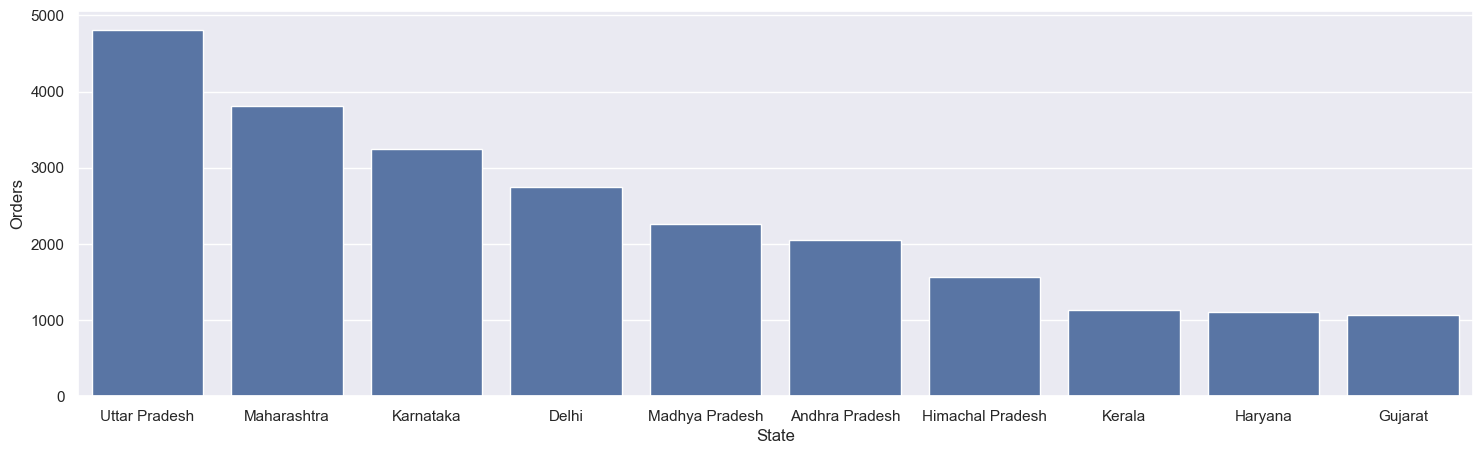

In [27]:
state_orders = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by= 'Orders', ascending=False).head(10)
sns.set_theme(rc={'figure.figsize':(18,5)})
sns.barplot(x='State', y='Orders', data= state_orders)

<Axes: xlabel='State', ylabel='Amount'>

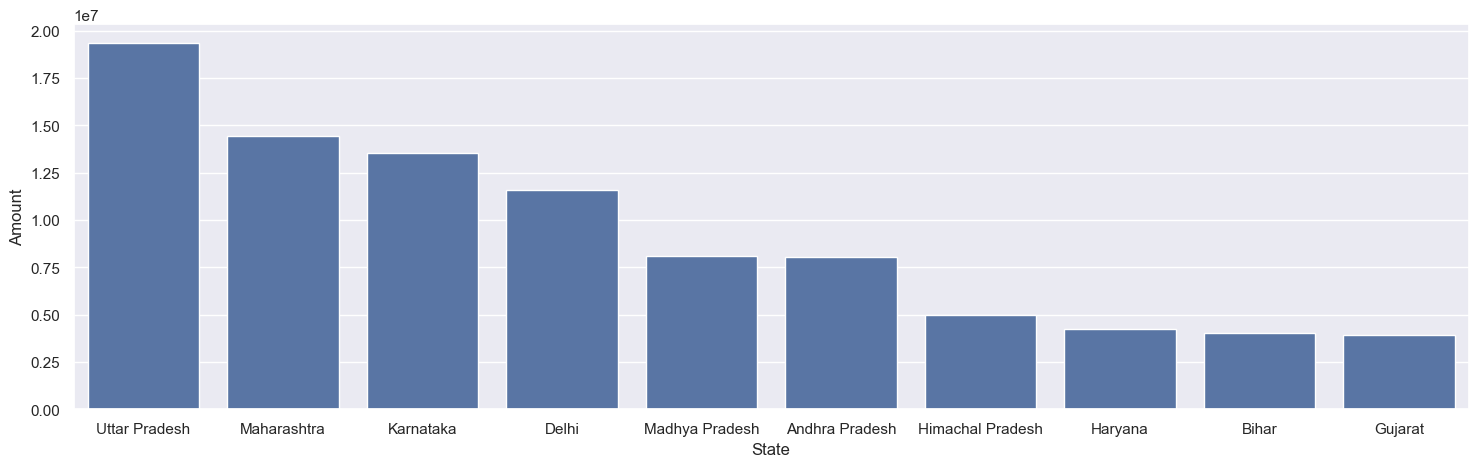

In [28]:
state_amount = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)
sns.set_theme(rc={'figure.figsize':(18,5)})
sns.barplot(x='State', y='Amount', data= state_amount)

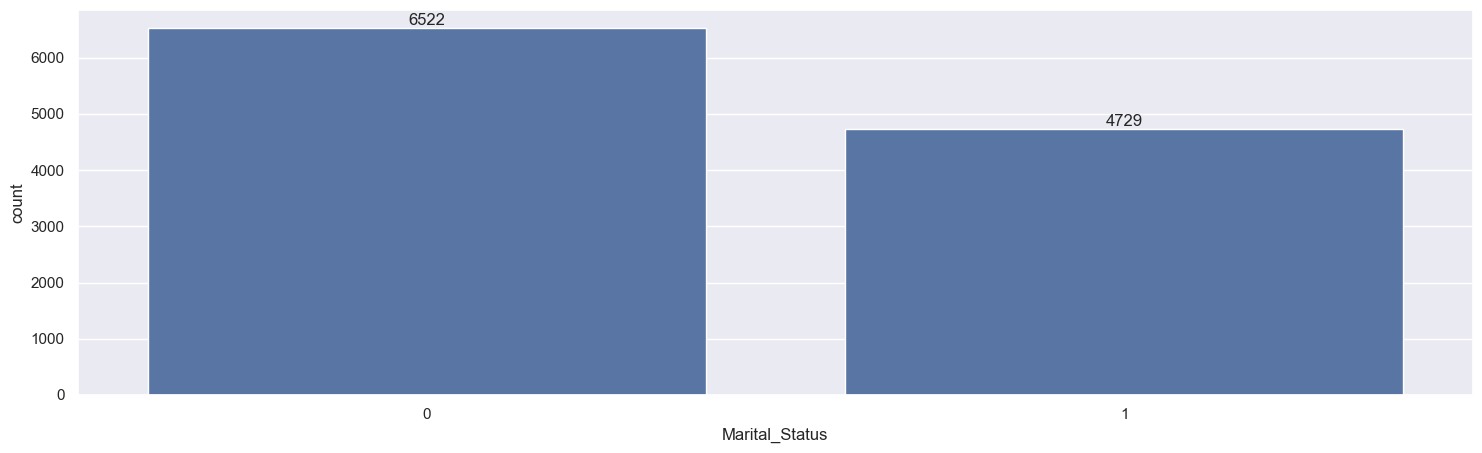

In [31]:
ax= sns.countplot(data= df, x='Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

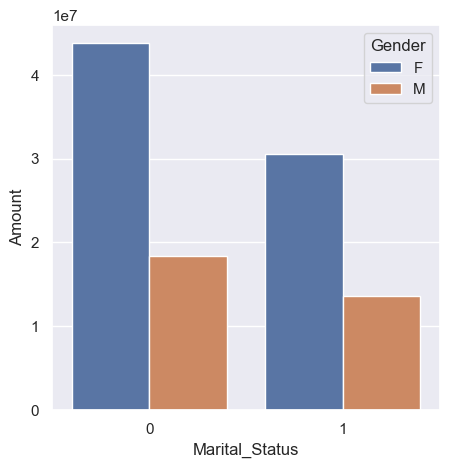

In [38]:
am_mr = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)
sns.set_theme(rc={'figure.figsize':(5,5)})
sns.barplot(x='Marital_Status', y='Amount', hue= 'Gender', data= am_mr)

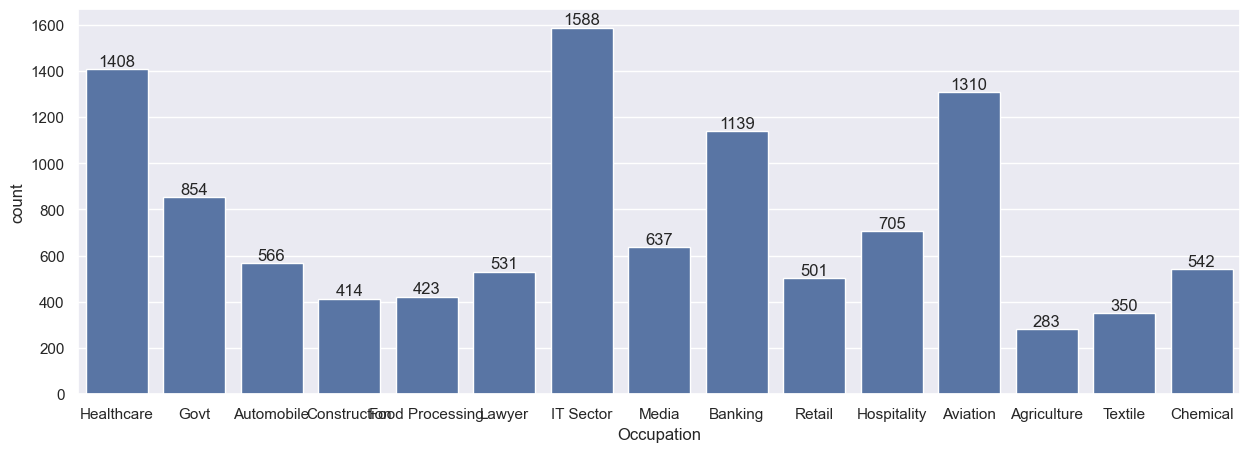

In [39]:
sns.set_theme(rc={'figure.figsize': (15,5)})
ax= sns.countplot(data= df, x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

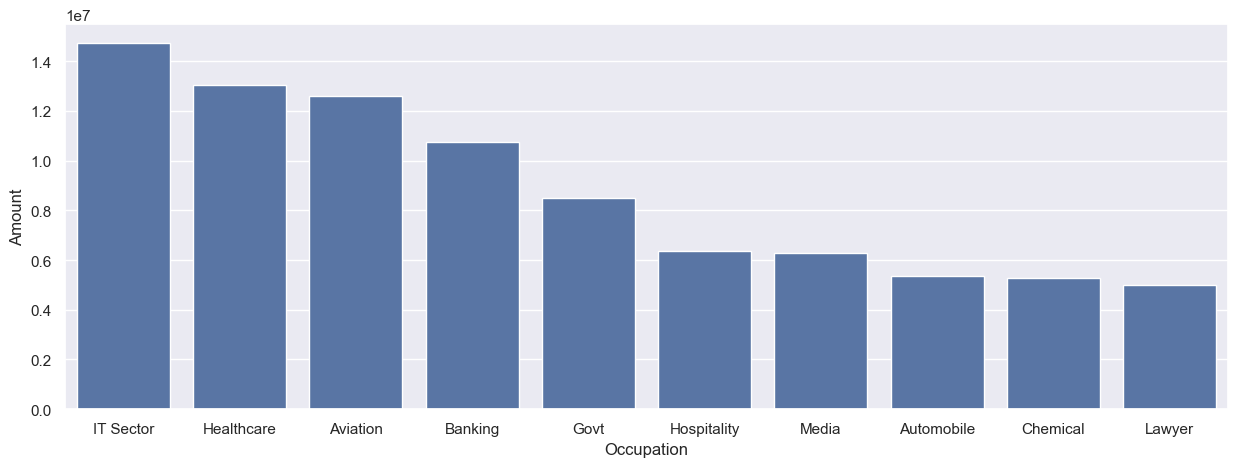

In [42]:
am_mr = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)
sns.set_theme(rc={'figure.figsize':(15,5)})
sns.barplot(x='Occupation', y='Amount', data= am_mr)

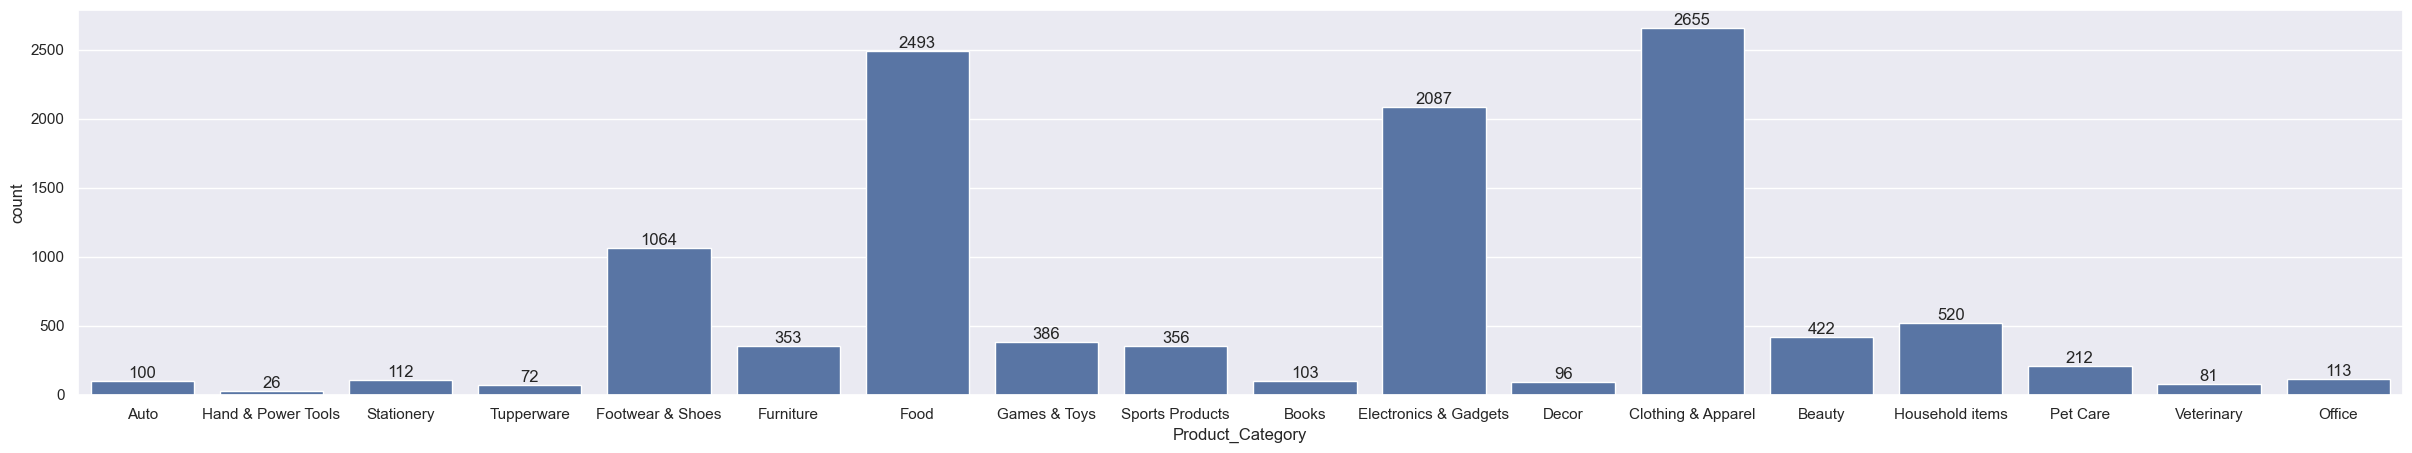

In [45]:
sns.set_theme(rc={'figure.figsize': (30,5)})
ax= sns.countplot(data= df, x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

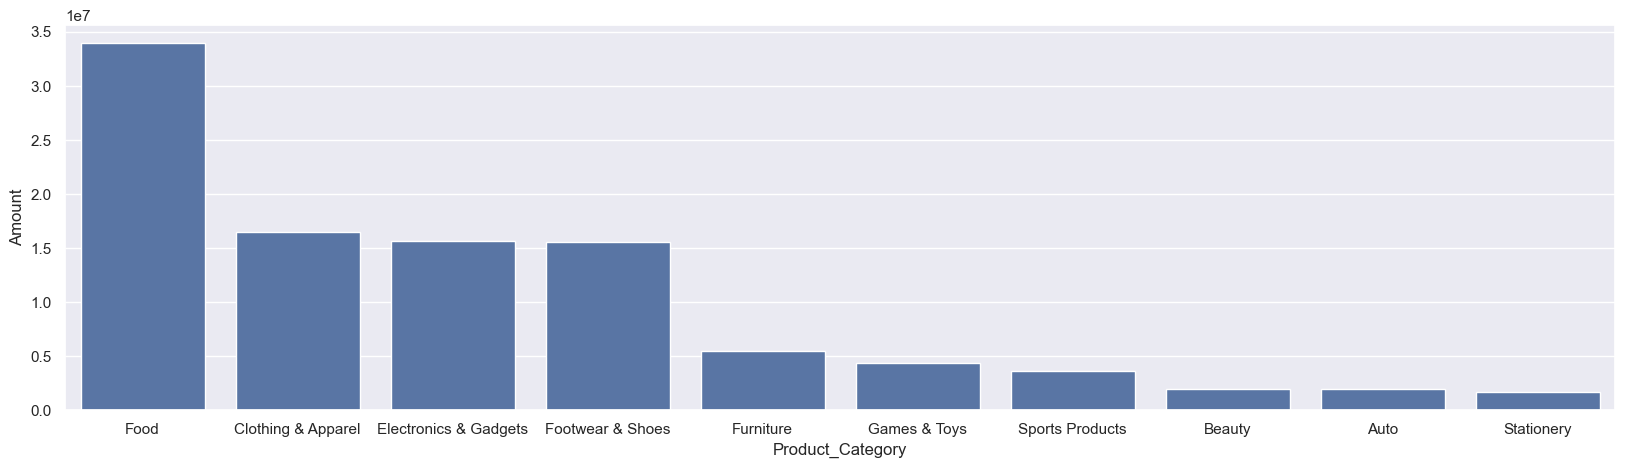

In [47]:
am_mr = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)
sns.set_theme(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category', y='Amount', data= am_mr)